In [1]:
from vcat import ImageData

2025-05-19 14:35:31,963 - INFO - vcat - Logging initialized. Log file: Console only
2025-05-19 14:35:31,963 - INFO - vcat - Using config file VCAT_CONFIG=/home/flep98/VCAT/vcat/config.yaml
2025-05-19 14:35:31,963 - INFO - vcat - Using DIFMAP Path: /usr/local/difmap/uvf_difmap_2.5g/
2025-05-19 14:35:31,964 - INFO - vcat - Using uv-weighting: [0, -1]
2025-05-19 14:35:31,964 - INFO - vcat - Using font: Quicksand
2025-05-19 14:35:31,964 - INFO - vcat - Using noise method: Histogram Fit
2025-05-19 14:35:31,965 - INFO - vcat - Using modelfit error method: Schinzel12
2025-05-19 14:35:31,965 - INFO - vcat - Using resolution limit method: Kovalev05


Thank you for using VCAT. Have fun with VLBI!
If you are using this package please cite VCAT Team et al. 2025 ....



Image of the source 3C111 at frequency 8.4 GHz on 2014-05-08 
    Total cleaned flux: 3815.199 mJy 
    Image Noise: 0.246 mJy using method 'Histogram Fit'
No polarization data loaded.
No model loaded. Clean model info: 
    Model Flux: 3815.199 mJy 
    Number of Components: 1555


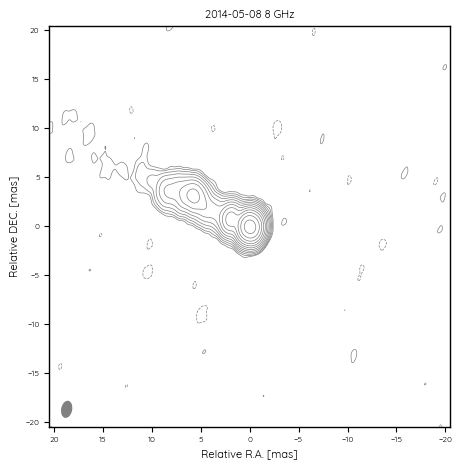

In [2]:
#Let's load some data
data=ImageData("../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.fits", #Stokes I Fits
               "../dataset_example/3C111_X_2014_05_08/3C111_X_2014_05_08.uvf", #uvf file (not necessary, but better)
              difmap_path="/usr/local/difmap/uvf_difmap_2.5g") #uvf file (not necessary, but better)

#get some info and plot it
print(data)
data.plot()

2025-05-19 14:36:16,884 - INFO - vcat - Automatically determined jet direction 63.0°.


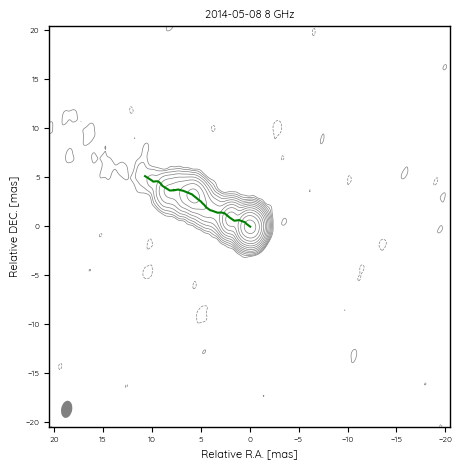

In [3]:
#There are currently two methods implemented to derive a ridgeline
#Let's start with the "slices" method which will rotate the jet to the y-axis and then performs an analysis on each horizontal pixelslice
#Note that this method might not work for strongly bent jets

#To get the ridgeline we can do
ridgeline, _ = data.get_ridgeline(method="slices")

#this operation will automatically attach the new ridgeline to the ImageData object (data.ridgeline), so we can immediately plot it
data.plot(plot_ridgeline=True,ridgeline_color="green")

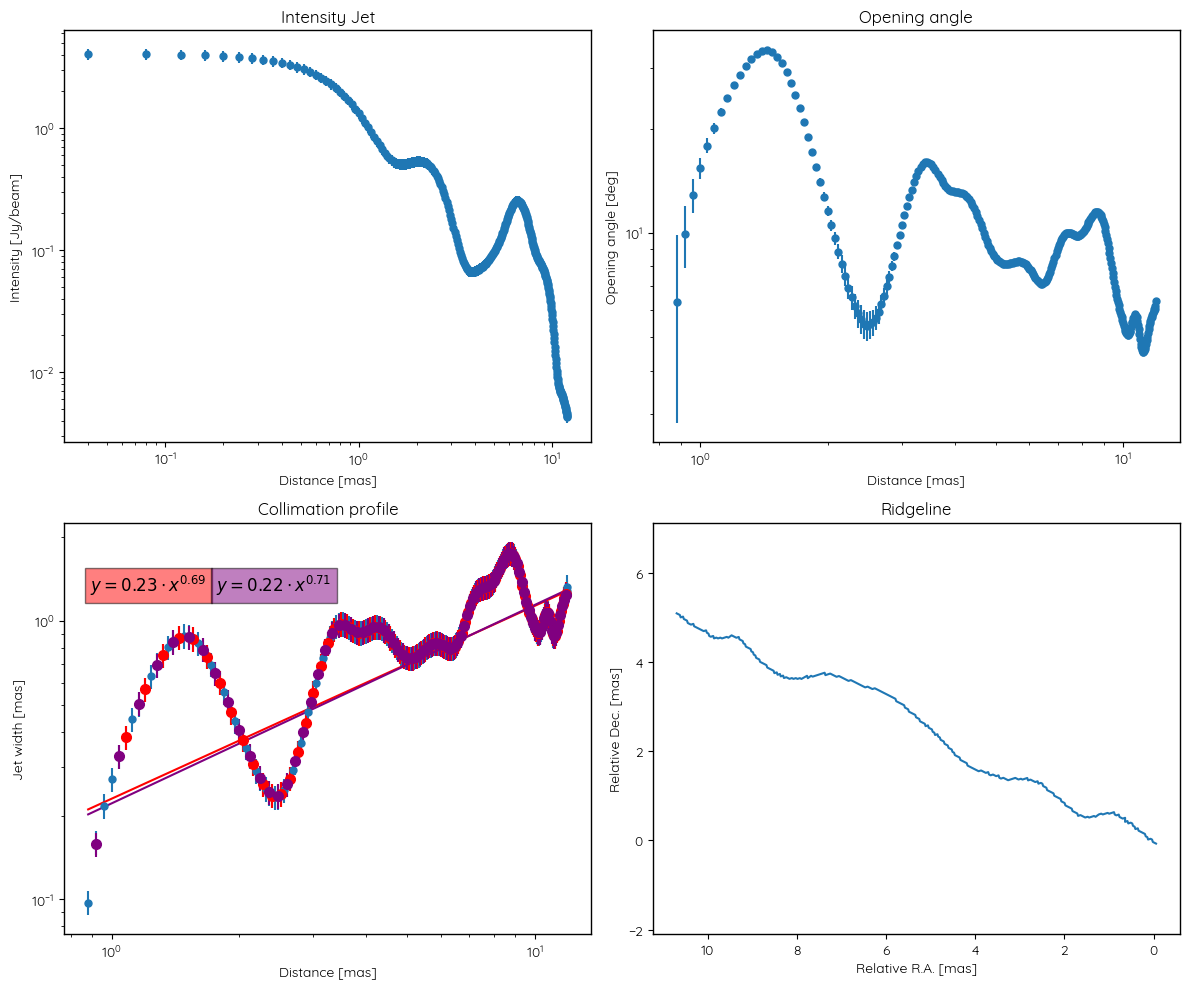

In [4]:
#The ridgeline itself has some useful plot methods that can be used as follows:

#For better visibility, we will arrange them in a 2x2 subplot grid using matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(12,10))

#Flux profile
ridgeline.plot("intensity",fig=fig,ax=ax[0,0],show=False)

#opening angle
ridgeline.plot("open_angle",fig=fig,ax=ax[0,1],show=False)

#jet width/collimation profile, including fits
ridgeline.plot("width",fig=fig,ax=ax[1,0],fit=True,show=False)

#ridgeline itself
ridgeline.plot("ridgeline",fig=fig,ax=ax[1,1],show=False)

#and finally display all the plots
plt.tight_layout()
plt.show()


#Note that all of these values are also accesible manually, if you prefer doing your own custom plots
open_angle=data.ridgeline.open_angle #.width, .dist, .intensity, .X_ridg, .Y.ridg

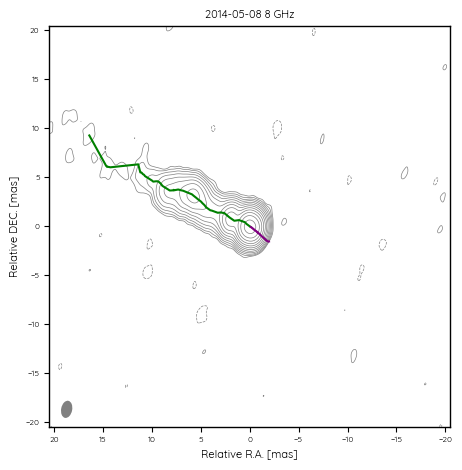

In [5]:
#If the automatic detection does not work, we can choose to manually provide the jet angle
jet_angle=63
auto_rotate=False
#additionally, we also want to find the counterjet, this is possible by setting
counterjet=True

#Additionally we can apply some cuts for the fits
cut_radial=3.0 #signal-to-noise cut for pixels to consider in the fit
cut_final=5.0 #signal-to-noise cut for the final peak flux

#And adjust the final chi-squared value which is used to determine good fits for the width and opening angle
chi_sq_val=100.0

#Let's do the fit again including counterjet
ridgeline, counter_ridgeline = data.get_ridgeline("slices",counterjet=counterjet,jet_angle=jet_angle,auto_rotate=auto_rotate,
                                                  cut_radial=cut_radial,cut_final=cut_final,chi_sq_val=chi_sq_val)

#and plot the data including the counterjet
data.plot(plot_ridgeline=True,ridgeline_color="green",plot_counter_ridgeline=True,counter_ridgeline_color="purple")

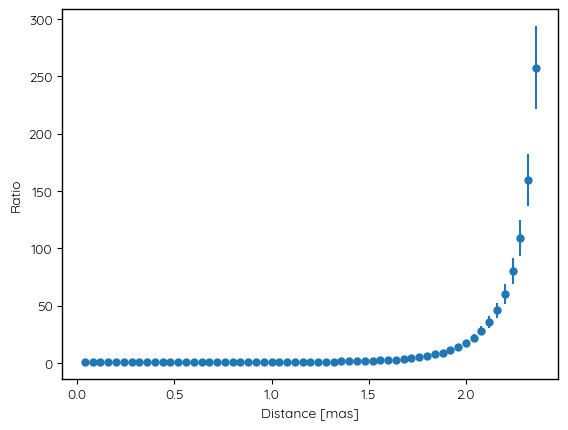

In [6]:
#if there is a counterjet ridgeline and a jet ridgeline defined, we can plot the jet to counterjet profile
data.jet_to_counterjet_profile()

2025-05-19 14:41:28,158 - INFO - vcat - will apply shift (x,y): [-0.04000000009455 : 0.0] mas
2025-05-19 14:42:16,757 - INFO - vcat - Automatically determined jet direction 63.0°.


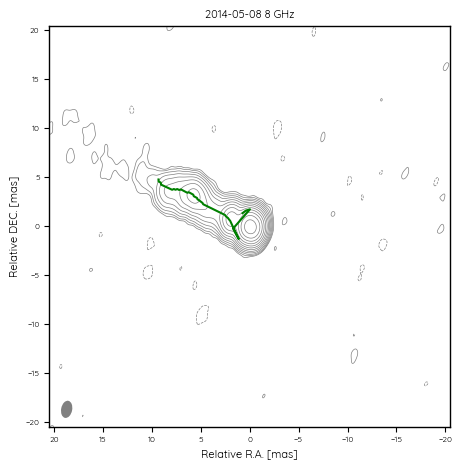

In [7]:
#Let's also have a look at the second method that is implemented, called "polar",
#This method converts the image to polar coordinates and performs a gaussian fit for every azimuthal slice
#This method currently only works without counterjet

data=data.center()

#sometimes this method can be problematic in the inner region close to the jet, so you can define a start_radius in mas where to begin the fit
start_radius=1.5 #mas

#Let's give it a try:
ridgeline, _ = data.get_ridgeline("polar",start_radius=start_radius)

#let's plot it
data.plot(plot_ridgeline=True,ridgeline_color="green")

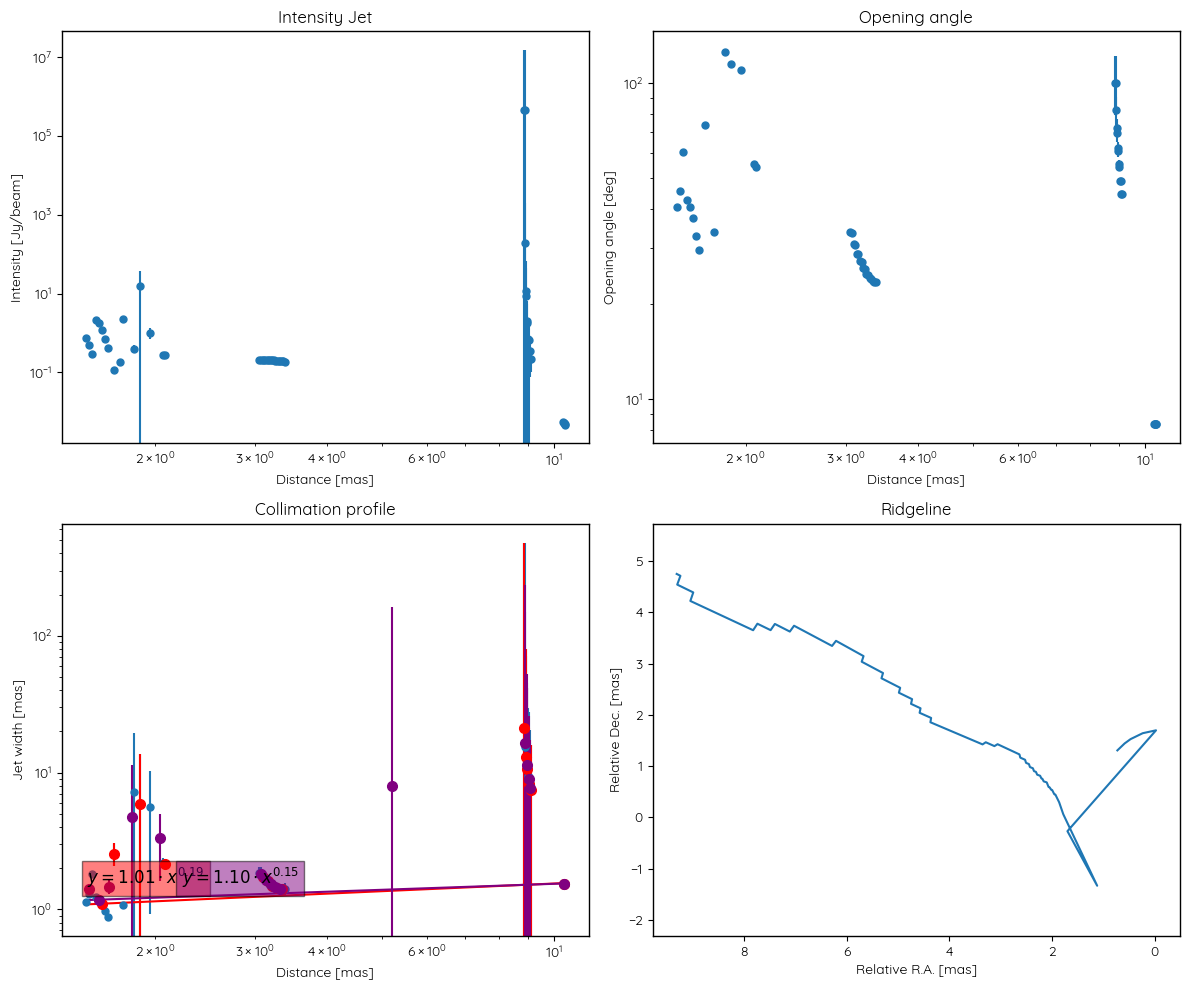

In [8]:
#Let's create the same ridgeline plots as before for comparison with the 'slices' method:

#For better visibility, we will arrange them in a 2x2 subplot grid using matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,2,figsize=(12,10))

#Flux profile
ridgeline.plot("intensity",fig=fig,ax=ax[0,0],show=False)

#opening angle
ridgeline.plot("open_angle",fig=fig,ax=ax[0,1],show=False)

#jet width/collimation profile, including fits
ridgeline.plot("width",fig=fig,ax=ax[1,0],fit=True,show=False)

#ridgeline itself
ridgeline.plot("ridgeline",fig=fig,ax=ax[1,1],show=False)

#and finally display all the plots
plt.tight_layout()
plt.show()